### Table of contents : <br/>
1. Install xgboost
2. Importing libraries and dataset
3. EDA
3. Parameter description
4. Initialize catboost model
5. Model building
4. xgboost hyperparameter tuning

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Importing libraries and dataset</h2>
</div>

In [5]:
# pip install catboost

In [6]:
import pandas as pd # for data manupulation
import numpy as np # for numeric operation
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn and matplotlib for visualization

import catboost as cb
#performing classification

from sklearn.model_selection import train_test_split,GridSearchCV 
# Gridsearchcv for hyperparameter tuning
# train_test_split for splitting

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
#these are classification evaluation metric


import warnings
warnings.filterwarnings("ignore") # for not displaying warning
pd.set_option("display.max_columns", 100) # default number of rows to be displayed.


In [7]:
df = pd.read_csv('heart.csv') #load the dataset
df.head() #print first 5 record

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>EDA</h2>
</div>

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum() #check for null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

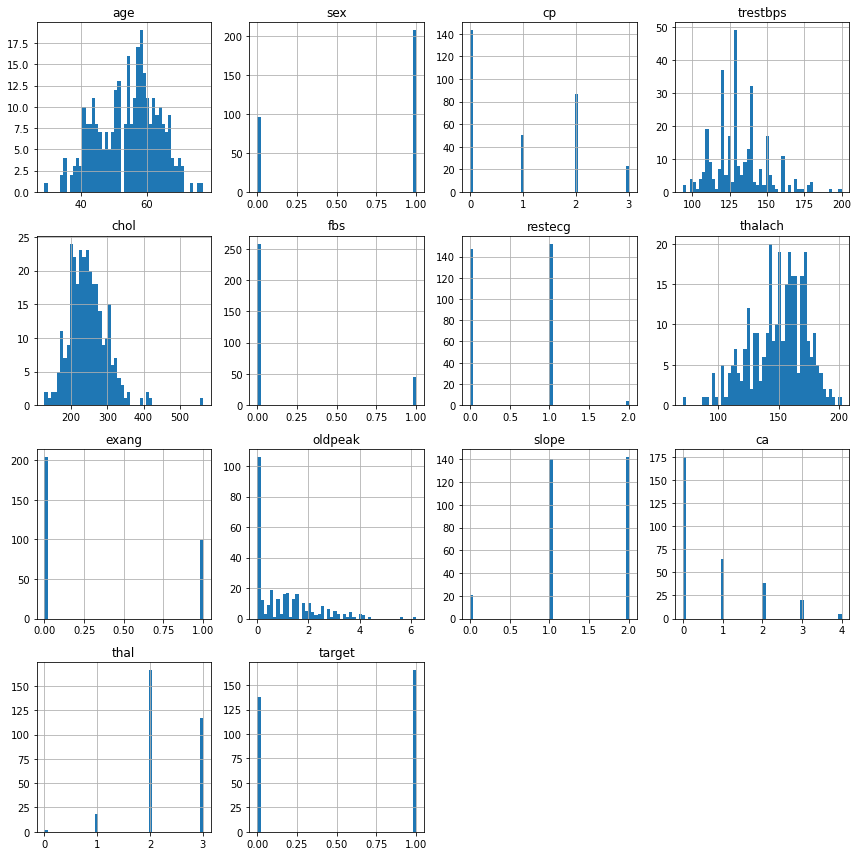

In [10]:
df.hist(figsize=(12,12),bins=50)
plt.tight_layout()

In [11]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

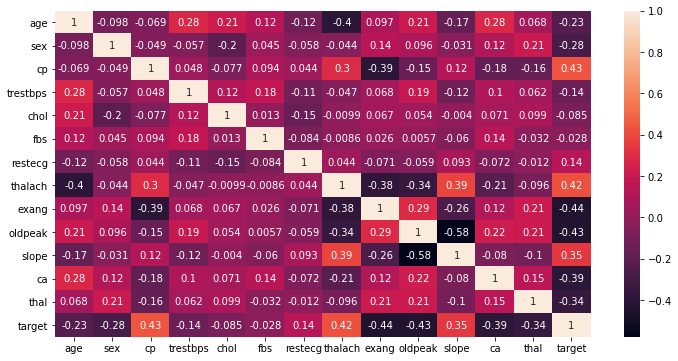

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True)

#correlation plot

In [13]:
X=df.drop("target",axis=1)
y=df["target"]

#get feature and target variable

### Train test split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#get training and testing data

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Parameter description</h2>
</div>

- loss_function : eval metric used for training
- iterations : max number of tree  that can be build.
- learning_rate : used for reducing the gradient setp
- depth : the depth of the tree 
- n_jobs : The number of jobs to run in parallel and  -1 means using all processors.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Initialize Catboost</h2>
</div>

In [15]:
cb_cls = cb.CatBoostClassifier(silent=True) #silet=True can help to suppress the iteration logs
#initialize the cb classifier 
cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict


# evaluation metric

print('--------Classification report--------\n',classification_report(y_test, y_pred))
print('--------Confusion Matrix--------\n',confusion_matrix(y_test, y_pred))
print('Test  accuracy Score : %.2f'%accuracy_score(y_test, y_pred))
print('f1 score : %2f'%f1_score(y_test, y_pred))

--------Classification report--------
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

--------Confusion Matrix--------
 [[32  9]
 [10 40]]
Test  accuracy Score : 0.79
f1 score : 0.808081


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- Here we good test accuracy 79% and f1 score 80%.
- We used silent = True, to avoid the iteration log.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model building</h2>
</div>

#### depth = 3
- Let's build model with the maximum depth of tree as 3

In [17]:
cb_cls = cb.CatBoostClassifier(silent=True, depth= 5) #silet=True can help to suppress the iteration logs

cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict


# evaluation metric

print('--------Classification report--------\n',classification_report(y_test, y_pred))
print('--------Confusion Matrix--------\n',confusion_matrix(y_test, y_pred))
print('Test  accuracy Score : %.2f'%accuracy_score(y_test, y_pred))
print('f1 score : %2f'%f1_score(y_test, y_pred))

--------Classification report--------
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

--------Confusion Matrix--------
 [[32  9]
 [10 40]]
Test  accuracy Score : 0.79
f1 score : 0.808081


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- No changes in any scores.

#### depth = 8
- Let's build model with the maximum depth of tree as 8

In [19]:
cb_cls = cb.CatBoostClassifier(silent=True, depth = 8) #silet=True can help to suppress the iteration logs

cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict


# evaluation metric

print('--------Classification report--------\n',classification_report(y_test, y_pred))
print('--------Confusion Matrix--------\n',confusion_matrix(y_test, y_pred))
print('Test  accuracy Score : %.2f'%accuracy_score(y_test, y_pred))
print('f1 score : %2f'%f1_score(y_test, y_pred))

--------Classification report--------
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

--------Confusion Matrix--------
 [[32  9]
 [ 9 41]]
Test  accuracy Score : 0.80
f1 score : 0.820000


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- Both test accuracy and f1score increased by 2%
- accuray from 79% to 80% and f1 score from 80% to 82%

#### iteration = 10
- Let's build model by 10 iterations, which is maximum number of tree.

In [20]:
cb_cls = cb.CatBoostClassifier(silent=True, iterations = 10) #silet=True can help to suppress the iteration logs
 
cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict


# evaluation metric

print('--------Classification report--------\n',classification_report(y_test, y_pred))
print('--------Confusion Matrix--------\n',confusion_matrix(y_test, y_pred))
print('Test  accuracy Score : %.2f'%accuracy_score(y_test, y_pred))
print('f1 score : %2f'%f1_score(y_test, y_pred))

--------Classification report--------
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

--------Confusion Matrix--------
 [[32  9]
 [ 8 42]]
Test  accuracy Score : 0.81
f1 score : 0.831683


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- Both f1 score and accuracy increased .

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Hyperparameter Tuning</h2>
</div>

In [22]:
from sklearn.model_selection import GridSearchCV
#import grid searchcv for hypeparameter tuning

cb_clf = cb.CatBoostClassifier(silent=True)
params = {
         'iterations': [10, 50, 100],
         'depth': [4, 5, 6, 10],
         'loss_function': ['Logloss', 'CrossEntropy'],
         'learning_rate' : [0.01, 0.05, 0.1, 0.5]
        }
#define params 


grid_search = GridSearchCV(cb_clf, params, n_jobs=-1, cv = 3, verbose=1)

grid_search.fit(x_train, y_train)
#fit the params

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x11de8a4c0>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 10], 'iterations': [10, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss_function': ['Logloss', 'CrossEntropy']},
             verbose=1)

In [23]:
grid_search.best_params_
#let's see the best parameters as per our grid search

{'depth': 4,
 'iterations': 100,
 'learning_rate': 0.01,
 'loss_function': 'Logloss'}

In [24]:
y_pred = grid_search.predict(x_test)

print('After hyperparametertuning\n')
print('--------Classification report--------\n',classification_report(y_test, y_pred))
print('--------Confusion Matrix--------\n',confusion_matrix(y_test, y_pred))
print('Test  accuracy Score : %.2f'%accuracy_score(y_test, y_pred))
print('f1 score : %2f'%f1_score(y_test, y_pred))

After hyperparametertuning

--------Classification report--------
               precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

--------Confusion Matrix--------
 [[31 10]
 [ 6 44]]
Test  accuracy Score : 0.82
f1 score : 0.846154


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- After hypeparameter tuning our accuracy score increased from 79% to 82% and f1 score incresed from 80% to 84%.(compare scores where we initialized catboost model)